# PIPELINE WRAPPER (YOLOv3 + CRAFT + CRNN)

## Importar modulos

In [1]:
import os
import sys
import cv2
import time
import numpy as np

In [4]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

In [3]:
import src.Pipeline as alpr
import src.CraftTools as crafttools
import src.YOLOBbox as yolobbox
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


## PIPELINE

In [5]:
images = [os.path.join('dev/cars', f) for f in os.listdir('dev/cars') if os.path.isfile(os.path.join('dev/cars', f))]
names = [f for f in os.listdir('dev/cars') if os.path.isfile(os.path.join('dev/cars', f))]

In [6]:
print('Creating pipeline...')
pipeline = alpr.Pipeline()

Creating pipeline...


Performing predictions on: ['car_0.jpg', 'VW_Gol.jpg', 'car_1.jpg']
Total prediction time: 5.429267168045044 seconds
Printing files outputs and text predictions...


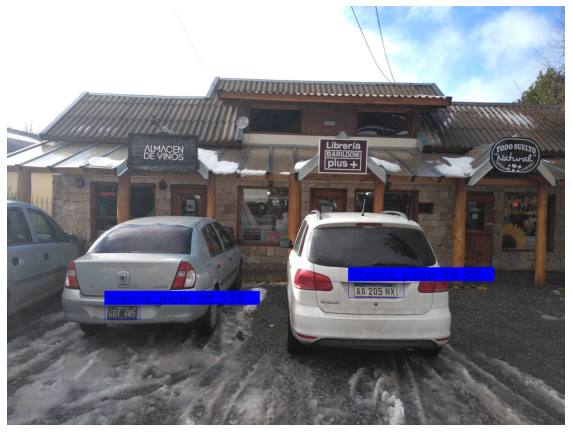

Predictions: [['aa', '205', 'nx'], ['gdt', '465']]


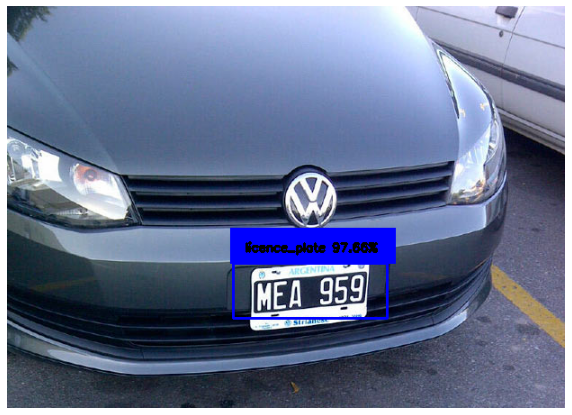

Predictions: [['mea', '959']]


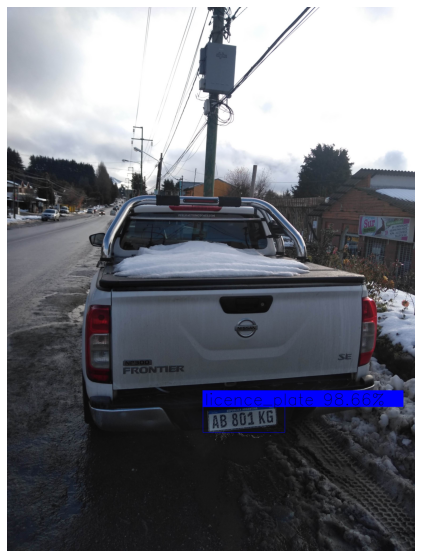

Predictions: [['ab', '801', 'kg']]




In [12]:
print('Performing predictions on: {}'.format(names))
start_time = time.time()
lp_boxes, txt_pred = pipeline.image(images, syntax_analyzer=True)
end_time = time.time()
print('Total prediction time: {} seconds'.format(end_time-start_time))
print('Printing files outputs and text predictions...')
for image, name, boxes, txt in zip(images, names, lp_boxes, txt_pred):
    output = yolobbox.draw_boxes(cv2.imread(image), boxes, ['licence_plate'])
    plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    print('Predictions: {}'.format(txt))
print('\n')

In [14]:
images = [os.path.join('dev/licence_plates/etc/', f) for f in os.listdir('dev/licence_plates/etc/') if os.path.isfile(os.path.join('dev/licence_plates/etc/', f))]
names = [f for f in os.listdir('dev/licence_plates/etc/') if os.path.isfile(os.path.join('dev/licence_plates/etc/', f))]

Performing predictions on: ['street_sign.jpg']
Total prediction time: 1.6040010452270508 seconds


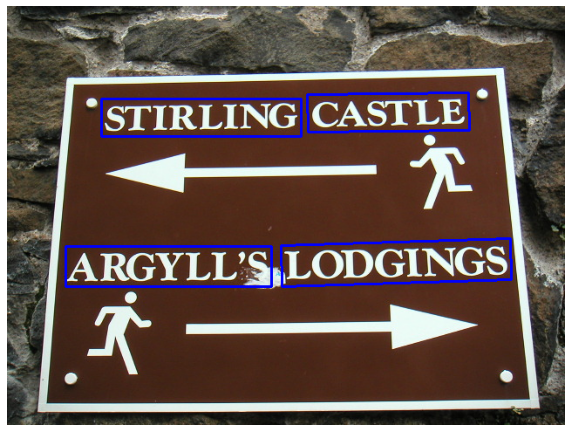

[['castle', 'stirling', 'lodgings', 'argylls']]




In [16]:
print('Performing predictions on: {}'.format(names))
start_time = time.time()
txt_images, scales = crafttools.scale_images([cv2.imread(image) for image in images])
txt_boxes = pipeline.text.detect(txt_images, **{})
txt_pred = pipeline.ocr.recognize_from_boxes(images=txt_images, box_groups=txt_boxes, syntax_analyzer=False, **{})
txt_boxes = crafttools.rescale_box(txt_boxes, scales)
end_time = time.time()
print('Total prediction time: {} seconds'.format(end_time-start_time))
for image, name, boxes in zip(images, names, txt_boxes): 
    output = crafttools.drawBoxes(cv2.imread(image), boxes, thickness=2)
    plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    print(txt_pred)
print('\n')

## CRNN

Performing predictions on: ['UW.png', 'word_2.jpg', '141.png', 'HND.png', 'word_4.jpg', '254.png', 'JAUJA.png', 'word_1.jpg', 'word_3.jpg', 'word_0.jpg']
Total prediction time: 3.650629997253418 seconds



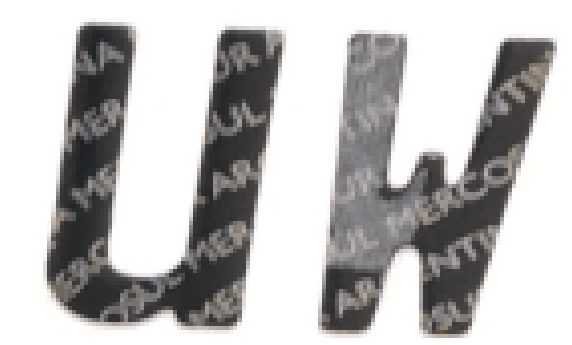

Prediction on UW.png: ul


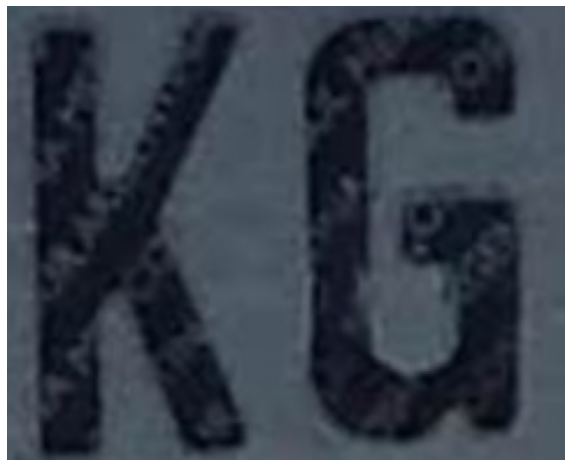

Prediction on word_2.jpg: kg


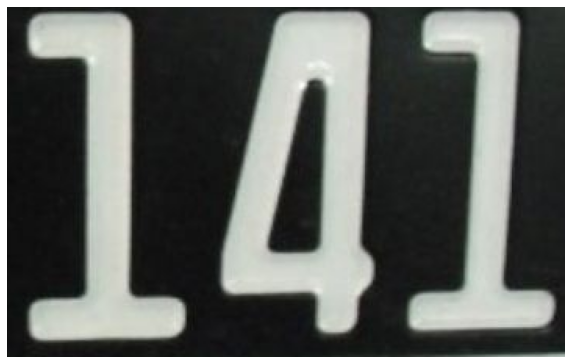

Prediction on 141.png: 141


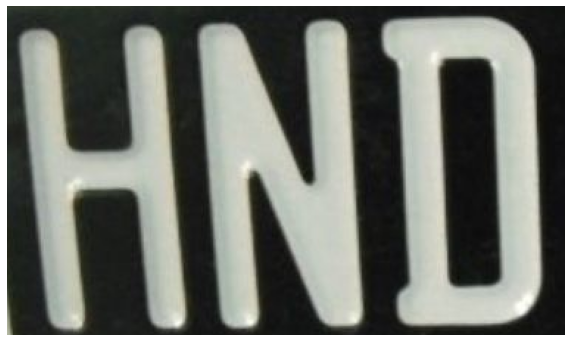

Prediction on HND.png: hnd


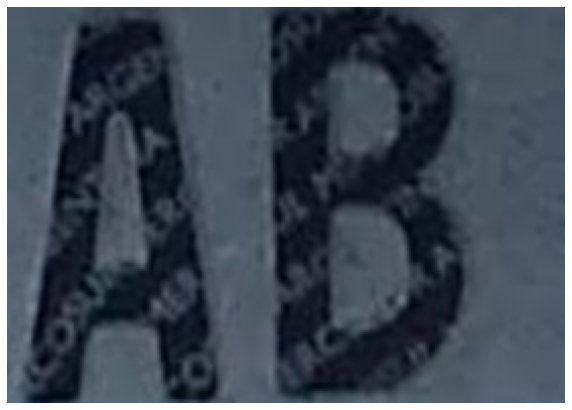

Prediction on word_4.jpg: ab


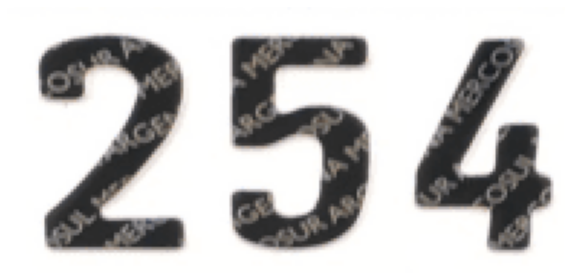

Prediction on 254.png: 254


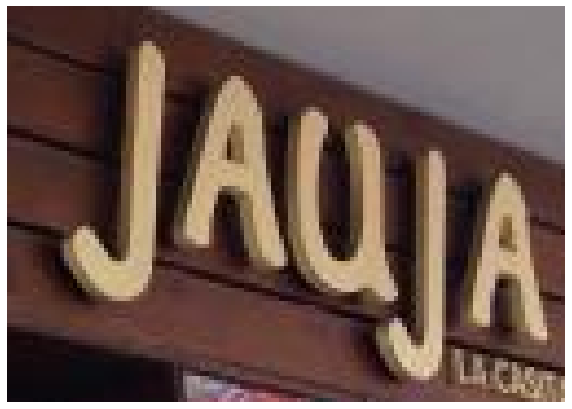

Prediction on JAUJA.png: jaujta


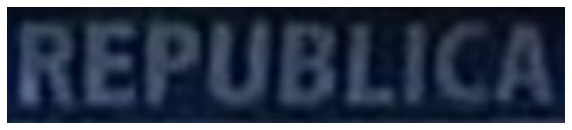

Prediction on word_1.jpg: republica


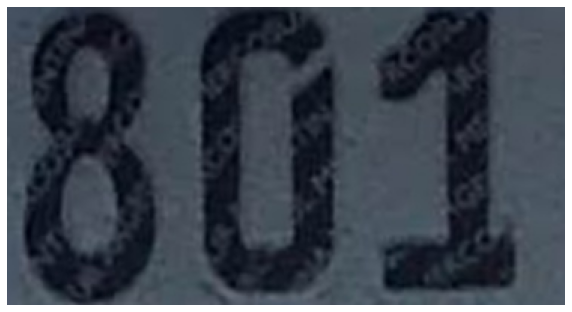

Prediction on word_3.jpg: 809


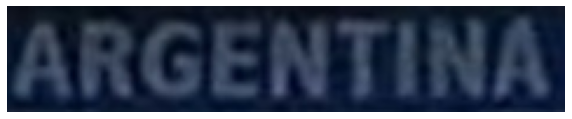

Prediction on word_0.jpg: argentina




In [17]:
images = [os.path.join('dev/words', f) for f in os.listdir('dev/words') if os.path.isfile(os.path.join('dev/words', f))]
names = [f for f in os.listdir('dev/words') if os.path.isfile(os.path.join('dev/words', f))]
pipeline = alpr.Pipeline()
print('Performing predictions on: {}'.format(names))
start_time = time.time()
txt_output = pipeline.ocr.recognize([cv2.imread(image) for image in images], **{})
end_time = time.time()
print('Total prediction time: {} seconds\n'.format(end_time-start_time))
for image, name, txt in zip(images, names, txt_output):
    plt.imshow(cv2.cvtColor(cv2.imread(image), cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    print('Prediction on {}: {}'.format(name,txt))
print('\n')

## CRAFT

Performing predictions on: ['AB372JN.jpg', 'AD537EY.jpg', 'AB661LS.jpg', 'GWF448.jpg', 'PGM566.jpg', 'JBA338.jpg', 'lp_hard.jpg', 'MWJ702.jpg', 'GJL979.jpg', 'DRW038.jpg', 'NCX113.jpg', 'KFF980.jpg', 'FZA404.jpg']
Total prediction time: 22.24501323699951 seconds



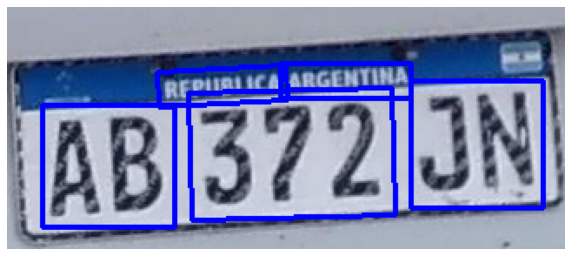

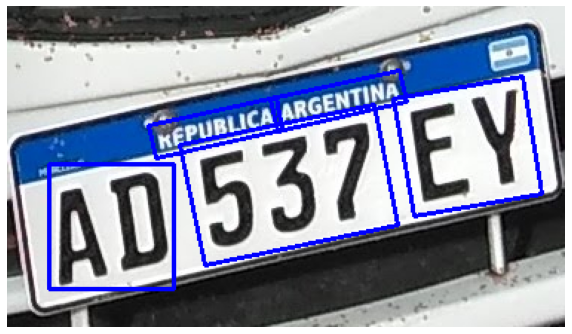

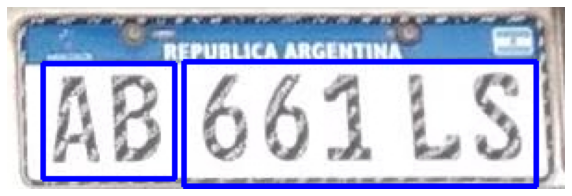

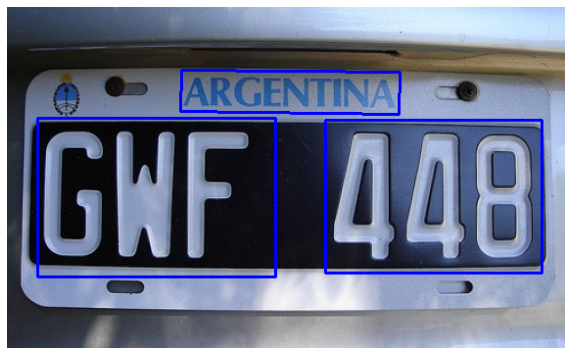

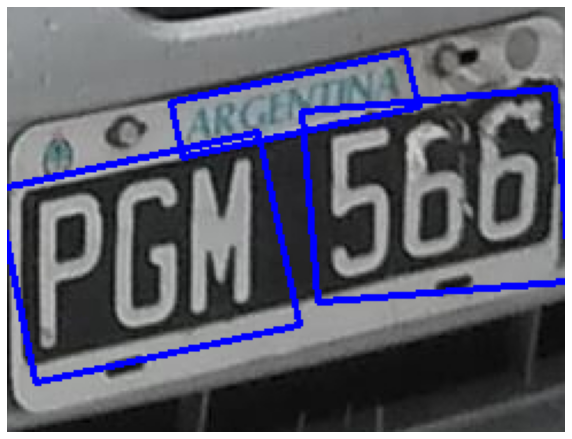

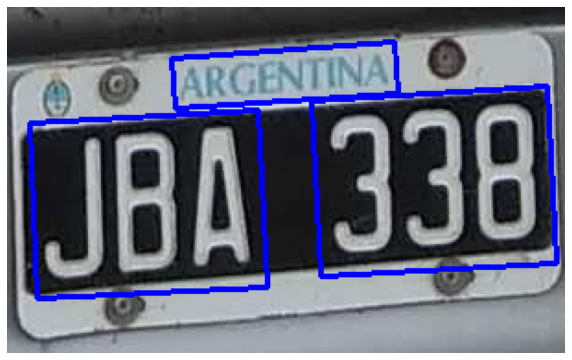

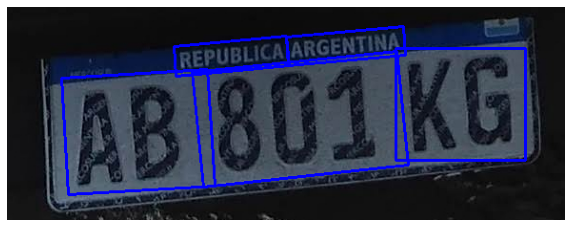

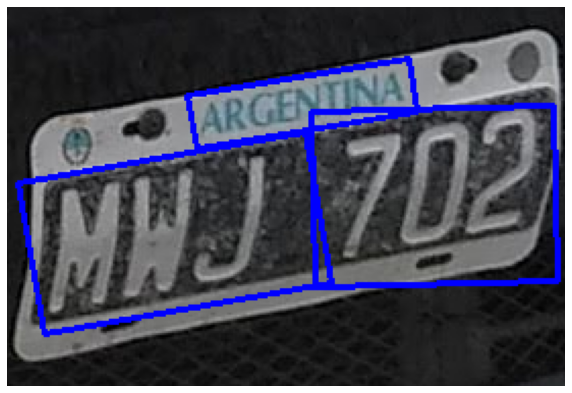

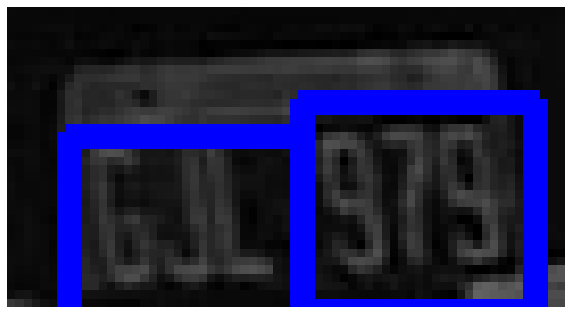

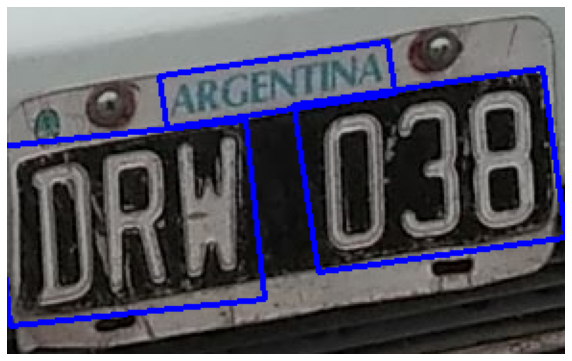

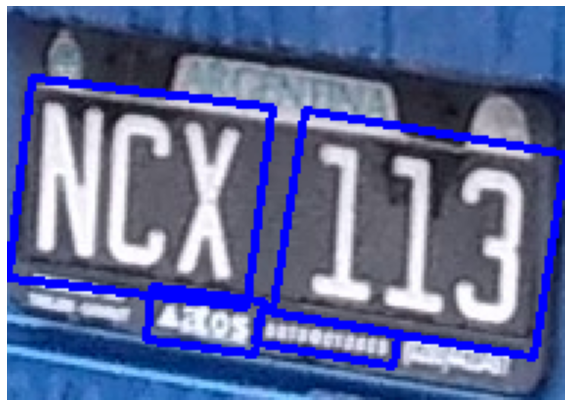

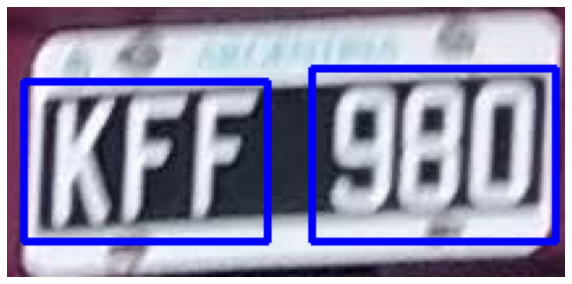

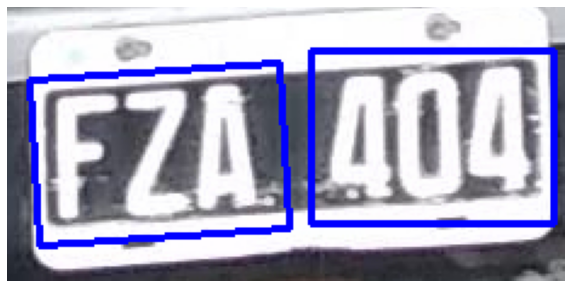

In [18]:
images = [os.path.join('dev/licence_plates', f) for f in os.listdir('dev/licence_plates') if os.path.isfile(os.path.join('dev/licence_plates', f))]
names = [f for f in os.listdir('dev/licence_plates') if os.path.isfile(os.path.join('dev/licence_plates', f))]
pipeline = alpr.Pipeline()
print('Performing predictions on: {}'.format(names))
start_time = time.time()
txt_images, scales = crafttools.scale_images([cv2.imread(image) for image in images])
txt_boxes = pipeline.text.detect(txt_images, **{})
txt_boxes = crafttools.rescale_box(txt_boxes, scales)
end_time = time.time()
print('Total prediction time: {} seconds\n'.format(end_time-start_time))
for image, name, boxes in zip(images, names, txt_boxes): 
    output = crafttools.drawBoxes(cv2.imread(image), boxes, thickness=2)
    plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
print('\n')

## YOLOv3 (Licence Plates)

Performing predictions on: ['car_0.jpg', 'VW_Gol.jpg', 'car_1.jpg']
Total prediction time: 4.103137254714966 seconds



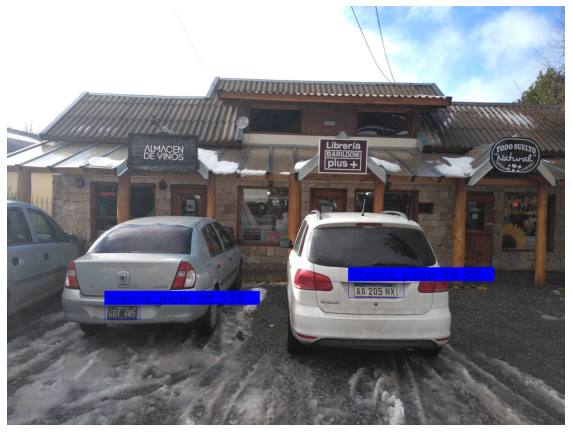

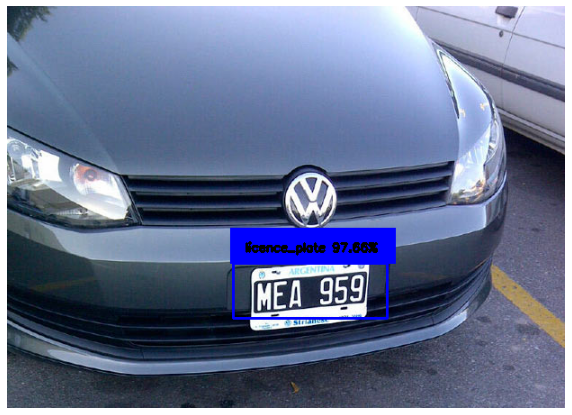

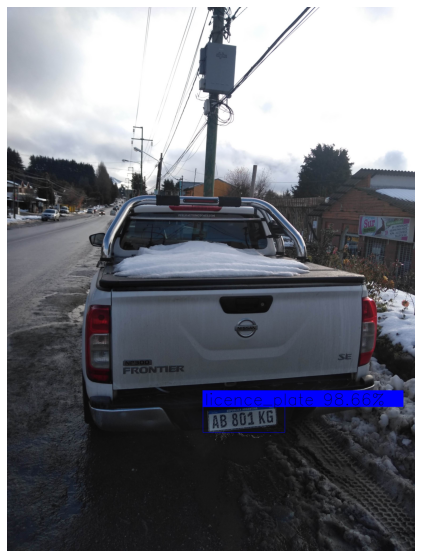

In [19]:
images = [os.path.join('dev/cars', f) for f in os.listdir('dev/cars') if os.path.isfile(os.path.join('dev/cars', f))]
names = [f for f in os.listdir('dev/cars') if os.path.isfile(os.path.join('dev/cars', f))]
pipeline = alpr.Pipeline()
print('Performing predictions on: {}'.format(names))
start_time = time.time()
lp_boxes = pipeline.lp.detect(images=[cv2.imread(image) for image in images], **{})
end_time = time.time()
print('Total prediction time: {} seconds\n'.format(end_time-start_time))
for image, name, boxes in zip(images, names, lp_boxes):	
    output = yolobbox.draw_boxes(cv2.imread(image), boxes, ['licence_plate'])
    plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
print('\n')